In [1]:
import pandas as pd
import unicodedata
from fastai.text import * 
from fastai.callbacks import *
from sklearn.model_selection import train_test_split
from pathlib import Path, PurePosixPath
import pickle as pkl

In [17]:
from pynvml import *
#learn.destroy()
torch.cuda.empty_cache()

nvmlInit()

handle = nvmlDeviceGetHandleByIndex(0)
info = nvmlDeviceGetMemoryInfo(handle)

print("Total memory:", info.total/1000000000)
print("Free memory:", info.free/1000000000)
print("Used memory:", info.used/1000000000)

this Learner object self-destroyed - it still exists, but no longer usable
Total memory: 6.442450944
Free memory: 4.551839744
Used memory: 1.8906112


In [3]:
PATH = Path('.')

In [7]:
train = pd.read_csv(PATH/'train.csv')

In [8]:
train.drop(['label_quality', 'language'], 1, inplace=True)

In [4]:
def normalize_title(title):
    return unicodedata.normalize('NFKD', title.lower()).encode('ASCII', 'ignore').decode('utf8')

In [4]:
df = pd.read_csv('train_prepromin.csv')

In [5]:
df

,title,category
0,ups interactiva 800 va con bateria reforzada 1...,STABILIZERS_AND_UPS
1,cinta venda cramer prolastic tape deporte 7cm ...,KINESIOLOGY_TAPES
2,vendo cama de 2 plazas de madera con colchon c...,BEDS
3,roda ciclismo mavic aksium elite + pneus yksio...,BICYCLE_WHEELS
4,saco de dormir echolife moon casal echolife,SLEEPING_BAGS
...,...,...
19995,lapis preto decorado coruja hb c/ borracha - u...,PENCILS
19996,bolsa residuo negra 50x70 - 100 unidades,TRASH_BAGS
19997,luva texx strike unissex design elegante 5xl /...,MOTORCYCLE_GLOVES
19998,correa distribucion fiat original palio weeken...,AUTOMOTIVE_TIMING_BELTS


In [5]:
data_lm = TextLMDataBunch.from_csv(
    PATH, 'train_prepro.csv', 
    text_cols='title', 
    label_cols='category', 
    valid_pct=0.05, 
    max_vocab=45040, bs=32
    )


#data_lm.save('data_lm_exportmin.pkl')


KeyboardInterrupt: 

In [12]:
data_lm.save('data_lm_exportmin.pkl')

In [18]:
data_lm = load_data(PATH, 'data_lm_exportmin.pkl', bs=32)

In [5]:
data_lm.vocab

In [6]:
len(data_lm.vocab.itos)

45040

In [11]:
data_lm = 16

# LM Train

In [20]:
learn = learn.load('sample-min-2')

In [19]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.05, pretrained=True)

Finding learning rate...


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.75E-02
Min loss divided by 10: 2.09E-02


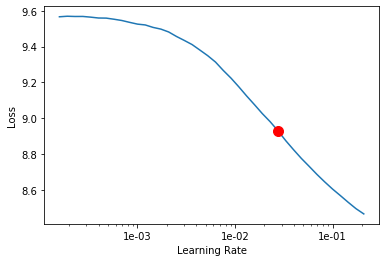

In [20]:
print('Finding learning rate...')
learn.lr_find()
learn.recorder.plot(skip_end=20, skip_start=40, suggestion=True)

In [10]:
# If finetuning an existing model, we must first train the head
learn.freeze()
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,6.195208,5.930789,0.201025,03:22


In [21]:
# If finetuning an existing model, we must then unfreeze the model and train it completely
learn.unfreeze()

In [22]:
learn.fit_one_cycle(
    2, 3e-3, callbacks=[SaveModelCallback(learn, every='epoch', monitor='accuracy', name='lm')]
)

epoch,train_loss,valid_loss,accuracy,time
0,5.495407,5.371612,0.225249,03:50
1,4.838576,5.119318,0.244809,03:53


In [30]:
len(learn.data.vocab.itos)

45040

In [23]:
learn.save('sample-min-2')

In [24]:
learn.save_encoder('sample-min-2-enc')


# Classification

In [15]:
data_clas = TextClasDataBunch.from_csv(
        PATH, 
        'train_prepro.csv', 
        bs=800, 
        text_cols='title', 
        label_cols='category'
        )

TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

In [20]:
data_clas.save('data_clas_smp.pkl')

In [25]:
data_clas = load_data(PATH,'data_clas_smp.pkl', bs=800)

In [31]:
len(data_clas.vocab.itos)

45040

In [14]:
data_clas.vocab = data_lm.vocab

In [ ]:
#learn.destroy()

In [27]:
data_clas.show_batch(rows=10)

text,target
xxbos taladro percutor profesional bosch gsb 13 re xxunk 650w mandril 13 mm 1 / 2 ' ' + maletin + 5 mechas widia 4 - 5 - 6 - 8 - 10 mm,ELECTRIC_DRILLS
xxbos cooler para acer aspire a515 - 51 a515 - 51 g a515 - 51 - xxunk a515 - 51 - xxunk - a series xxunk - xxunk xxunk t xxunk dc5v 0.5a,DESKTOP_COMPUTER_COOLERS_AND_FANS
xxbos bateria xxunk xxunk para hp probook 440 445 450 455 470 g0 g1 g2 pc xxunk - 001 707616 - 242 707616 - 421 hstnn - xxunk hstnn - xxunk,LAPTOP_BATTERIES
"xxbos cable hdmi xxunk de 15 pies - cable hdmi trenzado de 28 awg - listo para 3d , 4k ( 2160p ) - ultimo estandar probado a mano",AUDIO_AND_VIDEO_CABLES_AND_ADAPTERS
xxbos respaldo de cama luis xv estilo frances . tallado a mano en su cabezal . con medidas para cama king size . 2mts x xxunk .,HEADBOARDS
xxbos tornillo fix xxunk ( diametro x largo ) - cantidad : 3000u - ranura phillips - marca : jomarca - para tarugo no8 o madera,SCREWS
xxbos bateria 6 celdas para acer aspire one xxunk xxunk v5 - 171 725 series acer travelmate b113 b113 m xxunk series acer c7 / c710,LAPTOP_BATTERIES
xxbos tornillo fix 5x50 ( diametro x largo ) - cantidad : 500u - ranura phillips - marca : jomarca - para tarugo no8 o madera,SCREWS
xxbos bateria xxunk para dell inspiron 14 15 17 14r 15r 17r 3421 3521 3531 3721 5421 5521 5537 5727 xxunk xxunk xxunk xxunk n5,LAPTOP_BATTERIES
"xxbos frete gratis , base liquida velvet contem1 g - prova d`agua - avela 18 original , nota fiscal , pronta entrega , envio rapido",FOUNDATIONS


In [55]:
learn.data.vocab.itos

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'de',
 '-',
 '/',
 'para',
 'kit',
 '+',
 '2',
 ',',
 '.',
 '!',
 '(',
 'x',
 ')',
 'com',
 '4',
 'original',
 'e',
 '1',
 'a',
 'cm',
 'con',
 'c',
 '3',
 'mm',
 'y',
 '10',
 '5',
 'p',
 'm',
 '6',
 'led',
 '12',
 'em',
 '100',
 'g',
 '8',
 'en',
 'kg',
 'mesa',
 'gb',
 'bateria',
 'mini',
 'porta',
 'preto',
 'unidades',
 'usb',
 'azul',
 'gratis',
 '50',
 'do',
 'ford',
 '15',
 '20',
 'fiat',
 'motor',
 'digital',
 'pro',
 '220v',
 's',
 '*',
 '16',
 'caixa',
 'frete',
 'la',
 'tv',
 'bomba',
 'pecas',
 'branco',
 '7',
 '2.0',
 'ar',
 'l',
 'oferta',
 'infantil',
 'filtro',
 'caja',
 'juego',
 'aluminio',
 'luz',
 'inox',
 '18',
 '1.6',
 'agua',
 '%',
 'o',
 'honda',
 '30',
 'negro',
 'vw',
 'peugeot',
 'da',
 'capa',
 'super',
 'portatil',
 'rosa',
 'sensor',
 'maquina',
 'envio',
 'conjunto',
 'bebe',
 'renault',
 'notebook',
 'combo',
 'modelo',
 'jogo',
 'samsung',
 'sin',
 'madera',
 '40'

In [28]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.05, bptt=12, path=PATH)


In [29]:
learn.load_encoder('sample-min-2-enc')
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 8.32E-02
Min loss divided by 10: 6.31E-02


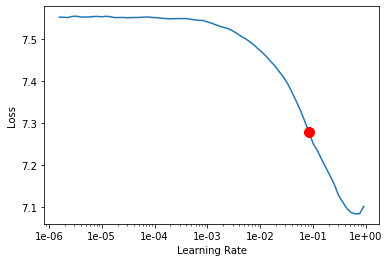

In [32]:
learn.lr_find()
learn.recorder.plot(skip_end=10, skip_start=15, suggestion=True)

In [33]:
learn.fit_one_cycle(1, 8e-2, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.533805,4.033926,0.385340,01:39


In [35]:
learn.save('clas-smp-1-head')

In [36]:
learn.freeze_to(-2)

In [37]:
learn.fit_one_cycle(2, slice(8e-4/(2.6**4), 8e-4), moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.731123,3.741898,0.432689,01:44
1,3.547563,3.651715,0.445939,01:40


In [38]:
learn.save('clas-smp-1-head2')

In [39]:
learn.unfreeze()

In [41]:
learn.fit_one_cycle(
    5, slice(3e-4/(2.6**4), 3e-4), moms=(0.8, 0.7)
    #, callbacks=[SaveModelCallback(learn, every='epoch', monitor='accuracy', name='class_fit_full'), PrintingCallback()]
)

epoch,train_loss,valid_loss,accuracy,time
0,3.484710,3.576655,0.457439,02:28
1,3.324085,3.400186,0.479938,02:29
2,3.156596,3.280950,0.495338,02:26
3,3.056308,3.225405,0.503012,02:28
4,3.023633,3.216128,0.504187,03:02


In [42]:
learn.save('clas-smp-1-full')